# Benchmark Bernoulli Markovian Tree model

This notebook aims at verifying the convergence and benchmarking the Bernoulli Markovian Tree Model.

## Artificial dataset

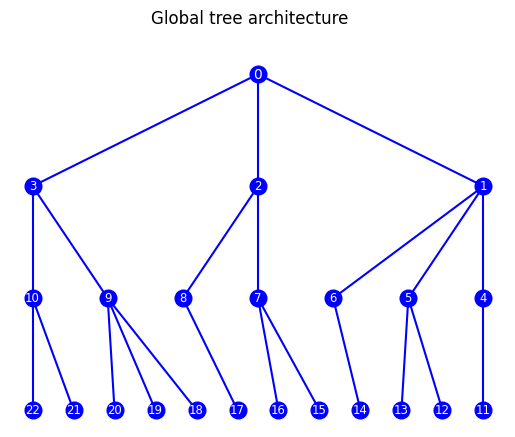

In [1]:
from src.utils import Tree
import matplotlib.pyplot as plt

# Define a global tree architecture

global_adjacency_matrix = [
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 0
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 1
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 3
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 4
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 5
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # node 6
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], # node 7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], # node 8
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], # node 9
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], # node 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 14
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 15
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 16
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 17
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 18
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 19
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 20
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 21
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 22
]

global_tree = Tree(global_adjacency_matrix)
global_tree.plot(title="Global tree architecture")
plt.show()

In [2]:
from src.model import BernoulliTreePrior, DirichletAbundanceTreePosterior
import numpy as np

# Generate the dataset based on the previous architecture
dataset_size = 1000

# First we define the parameters of the model, which are our objectives
activation_probabilities = {
    0:1,
    1:0.999,
    2:0.998,
    3:0.995,
    4:0.45,
    5:0.75,
    6:0.8,
    7:0.94,
    8:0.25,
    9:0.9,
    10:0.65,
    11:0.95,
    12:0.76,
    13:0.5,
    14:0.76,
    15:0.67,
    16:0.1,
    17:0.6,
    18:0.2,
    19:0.7,
    20:0.53,
    21:0.9,
    22:0.2
}

dirichlet_parameters = {}
for i, adjacency in enumerate(global_tree.adjacent_matrix):
    countChildren = np.sum(adjacency)
    if countChildren > 1:
        dirichlet_parameters[i] = np.abs(np.random.rand(countChildren))

def generate_dataset(size):

    prior = BernoulliTreePrior(global_tree.adjacent_matrix, activation_probabilities)
    posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters)

    trees = []

    for i in range(dataset_size):
        sampled_tree = prior.sample_tree()
        sampled_abundance_tree = posterior.sample_abundance_tree(sampled_tree)
        trees.append(sampled_abundance_tree)

    return trees

trees = generate_dataset(dataset_size)

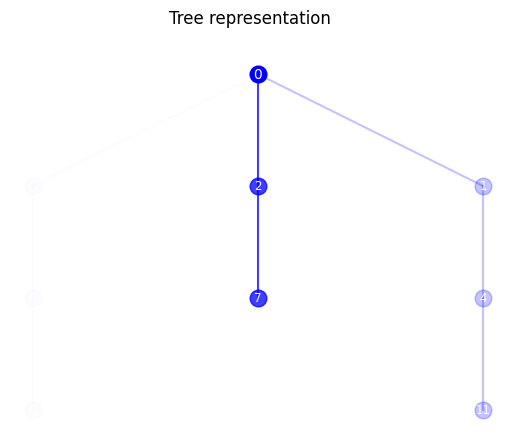

In [3]:
# plot a few trees
n_plot = 1
for i in range(n_plot):
    tree = trees[i]
    tree.plot()
plt.show()

## Learning the distributions over the artificial data

Fitting DirichletAbundanceTree - Likelihood: 12.636210000104928
Fitting DirichletAbundanceTree - Likelihood: 12.820475867683564
Fitting DirichletAbundanceTree - Likelihood: 12.861897034447232
Fitting DirichletAbundanceTree - Likelihood: 12.878387522132584
Fitting DirichletAbundanceTree - Likelihood: 12.887462537513303
Fitting DirichletAbundanceTree - Likelihood: 12.893283513198865
Fitting DirichletAbundanceTree - Likelihood: 12.89728233765728
Fitting DirichletAbundanceTree - Likelihood: 12.900124385397293
Fitting DirichletAbundanceTree - Likelihood: 12.902183530413343
Fitting DirichletAbundanceTree - Likelihood: 12.903693444294191
Fitting DirichletAbundanceTree - Likelihood: 12.904809421690032
Fitting DirichletAbundanceTree - Likelihood: 12.905638709396078
Fitting DirichletAbundanceTree - Likelihood: 12.906257289367556
Fitting DirichletAbundanceTree - Likelihood: 12.906719947550235
Fitting DirichletAbundanceTree - Likelihood: 12.907066674151524
Fitting DirichletAbundanceTree - Likeliho

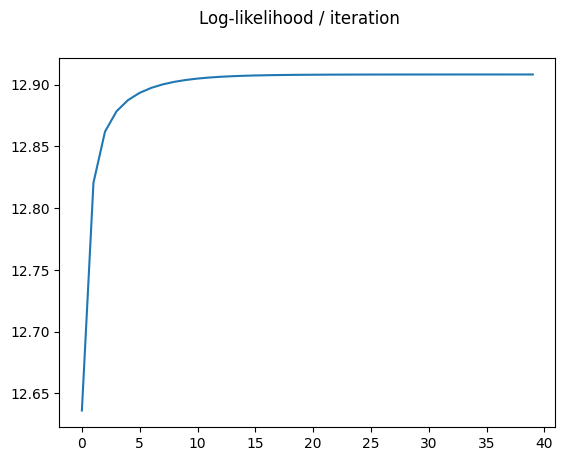

In [4]:
# Using the artificial dataset, we try to compute the p(X,T)

prior = BernoulliTreePrior(global_tree.adjacent_matrix, activation_probabilities={})
posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={})

prior.fit(trees)
ll = posterior.fit(trees, n_iter=40)

fig, axs = plt.subplots()
fig.suptitle("Log-likelihood / iteration")
axs.plot(ll)

Now we would like to compare the fitted distribution to the true one.

proba | node 0 : 1  -  1.0
proba | node 1 : 0.999  -  1.0
proba | node 2 : 0.998  -  1.0
proba | node 3 : 0.995  -  0.99
proba | node 4 : 0.45  -  0.457
proba | node 5 : 0.75  -  0.736
proba | node 6 : 0.8  -  0.792
proba | node 7 : 0.94  -  0.936
proba | node 8 : 0.25  -  0.256
proba | node 9 : 0.9  -  0.8949494949494949
proba | node 10 : 0.65  -  0.6535353535353535
proba | node 11 : 0.95  -  0.9562363238512035
proba | node 12 : 0.76  -  0.813858695652174
proba | node 13 : 0.5  -  0.53125
proba | node 14 : 0.76  -  0.7714646464646465
proba | node 15 : 0.67  -  0.6666666666666666
proba | node 16 : 0.1  -  0.09188034188034189
proba | node 17 : 0.6  -  0.625
proba | node 18 : 0.2  -  0.18510158013544017
proba | node 19 : 0.7  -  0.7223476297968398
proba | node 20 : 0.53  -  0.5349887133182845
proba | node 21 : 0.9  -  0.8964451313755796
proba | node 22 : 0.2  -  0.21792890262751158
alpha | node 0 : [0.65508136 0.41081972 0.89868037]  -  [0.65715041 0.40029581 0.86159834]
alpha | node 1 :

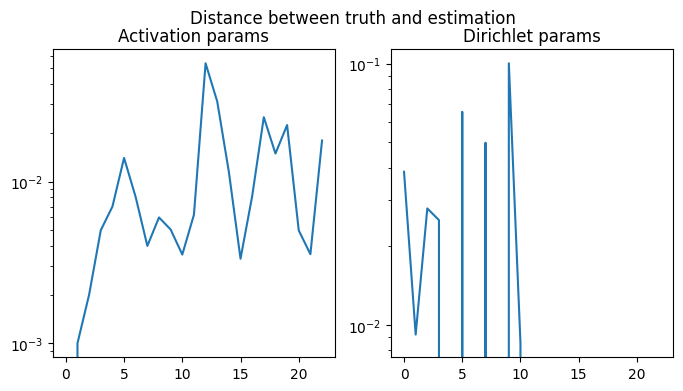

In [5]:
def compute_params_difference(prior, posterior, printValues=False):
    # We compute the distance between the activation probabilities
    activation_proba_difference = np.zeros(len(activation_probabilities.values()))
    for node_index in activation_probabilities.keys():
        activation_proba_difference[node_index] = np.abs(activation_probabilities[node_index] - prior.nodes[node_index].activationProba)
        if printValues:
            print("proba | node", node_index, ":", activation_probabilities[node_index], " - ", prior.nodes[node_index].activationProba)

    # Then we compute the distance between the alpha parameters of the dirichlet distribution
    dirichlet_params_difference = np.zeros(len(activation_probabilities.values()))
    for node_index in dirichlet_parameters.keys():
        dirichlet_params_difference[node_index] = np.linalg.norm(
            np.array(dirichlet_parameters[node_index]) - np.array(posterior.dirichlet_params[node_index])
        )
        if printValues:
            print("alpha | node", node_index, ":", dirichlet_parameters[node_index], " - ", posterior.dirichlet_params[node_index])

    return activation_proba_difference, dirichlet_params_difference

activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior, printValues=True)
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(activation_proba_difference)
axs[1].plot(dirichlet_params_difference)
axs[0].set_title("Activation params")
axs[1].set_title("Dirichlet params")
axs[1].set_yscale("log")
axs[0].set_yscale("log")
fig.suptitle("Distance between truth and estimation")
plt.show()

### Convergence per iteration

We can then plot the evolution of the distance per iteration

Fitting DirichletAbundanceTree - Likelihood: 12.096666796846538
Fitting DirichletAbundanceTree - Likelihood: 12.570002755826263
Fitting DirichletAbundanceTree - Likelihood: 12.723640371214447
Fitting DirichletAbundanceTree - Likelihood: 12.796539385356981
Fitting DirichletAbundanceTree - Likelihood: 12.838061252294453
Fitting DirichletAbundanceTree - Likelihood: 12.863304065639799
Fitting DirichletAbundanceTree - Likelihood: 12.878924153322222
Fitting DirichletAbundanceTree - Likelihood: 12.888631273504483
Fitting DirichletAbundanceTree - Likelihood: 12.89468659797774
Fitting DirichletAbundanceTree - Likelihood: 12.89849354401795
Fitting DirichletAbundanceTree - Likelihood: 12.90091954212934
Fitting DirichletAbundanceTree - Likelihood: 12.902496723744745
Fitting DirichletAbundanceTree - Likelihood: 12.903549799004
Fitting DirichletAbundanceTree - Likelihood: 12.904276507499473
Fitting DirichletAbundanceTree - Likelihood: 12.904797403174156
Fitting DirichletAbundanceTree - Likelihood: 1

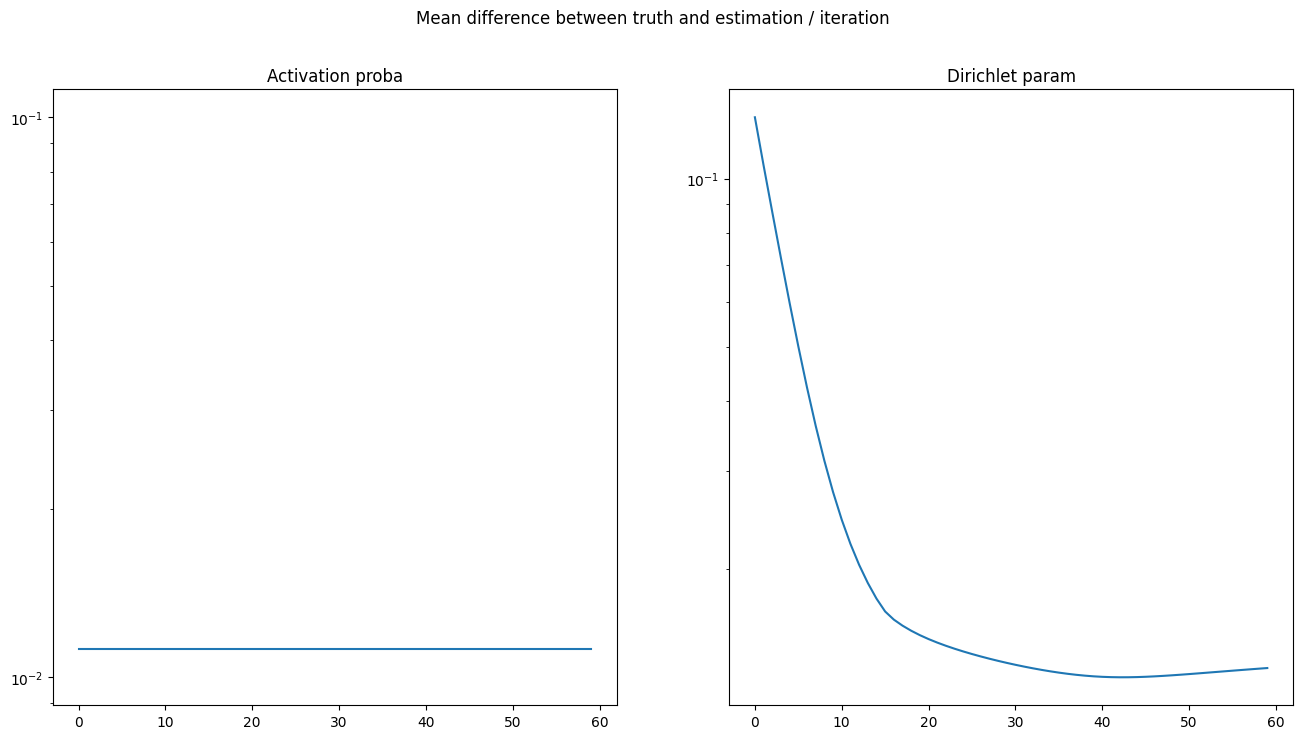

In [6]:
max_iter = 60

prior = BernoulliTreePrior(global_tree.adjacent_matrix, activation_probabilities={})
posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={})

prior.fit(trees)

activation_proba_mean_difference = np.zeros(max_iter)
dirichlet_params_mean_difference = np.zeros(max_iter)

for i in range(max_iter):

    posterior.fit(trees, n_iter=1)
    activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior)

    activation_proba_mean_difference[i] = activation_proba_difference.mean()
    dirichlet_params_mean_difference[i] = dirichlet_params_difference.mean()

fig, axs = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("Mean difference between truth and estimation / iteration")
axs[0].set_title("Activation proba")
axs[1].set_title("Dirichlet param")
axs[0].plot(activation_proba_mean_difference)
axs[1].plot(dirichlet_params_mean_difference)
axs[0].set_yscale('log')
axs[1].set_yscale('log')

### Convergence per sample

Fitting DirichletAbundanceTree - Likelihood: 12.397658926254758
Fitting DirichletAbundanceTree - Likelihood: 12.73279729377072
Fitting DirichletAbundanceTree - Likelihood: 12.836343318278352
Fitting DirichletAbundanceTree - Likelihood: 12.881592100441779
Fitting DirichletAbundanceTree - Likelihood: 12.905412448704999
Fitting DirichletAbundanceTree - Likelihood: 12.919690673166597
Fitting DirichletAbundanceTree - Likelihood: 12.92896451717729
Fitting DirichletAbundanceTree - Likelihood: 12.935274039721719
Fitting DirichletAbundanceTree - Likelihood: 12.939684721831565
Fitting DirichletAbundanceTree - Likelihood: 12.94282030799126
Fitting DirichletAbundanceTree - Likelihood: 12.945074888374505
Fitting DirichletAbundanceTree - Likelihood: 12.946709711126564
Fitting DirichletAbundanceTree - Likelihood: 12.947903275241373
Fitting DirichletAbundanceTree - Likelihood: 12.948779962392274
Fitting DirichletAbundanceTree - Likelihood: 12.949427614962678
Fitting DirichletAbundanceTree - Likelihood

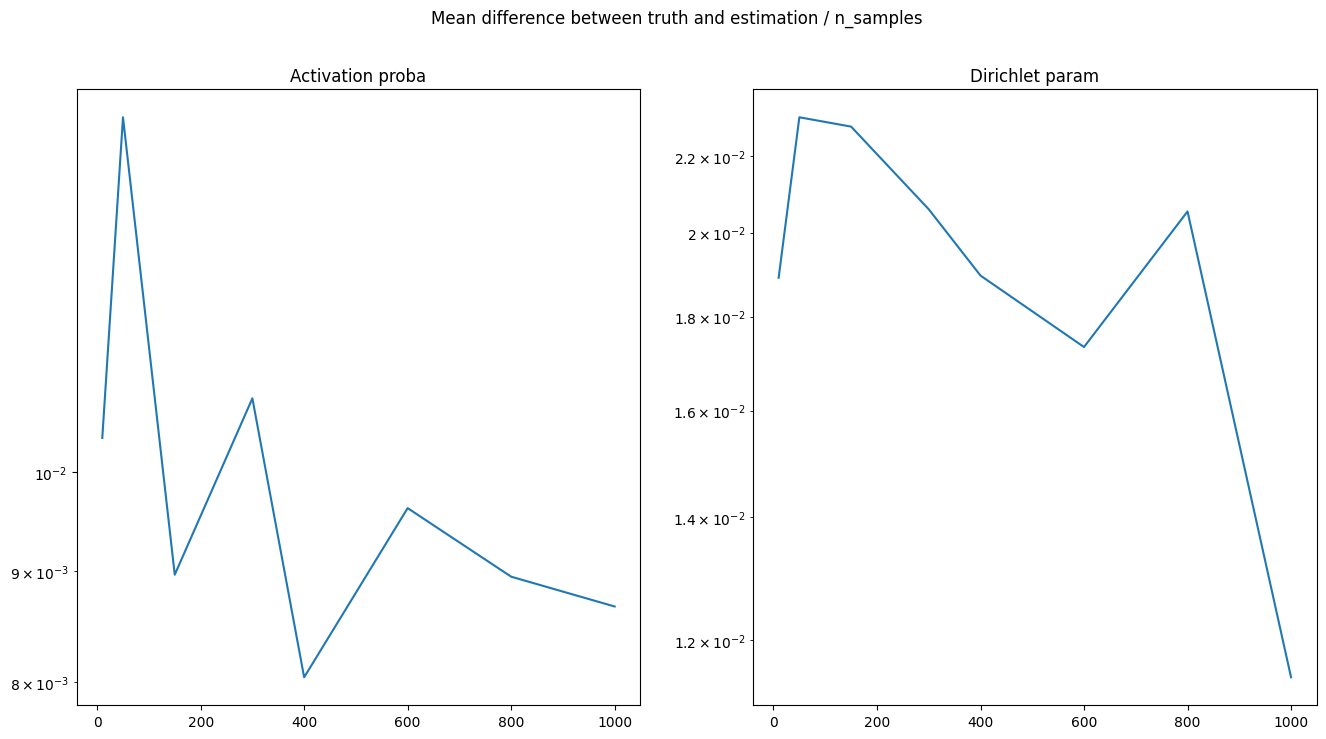

In [7]:
size_list = [10, 50, 150, 300, 400, 600, 800, 1000]

activation_proba_mean_difference = np.zeros(len(size_list))
dirichlet_params_mean_difference = np.zeros(len(size_list))

for i, size in enumerate(size_list):
    trees = generate_dataset(size)
    prior = BernoulliTreePrior(global_tree.adjacent_matrix, activation_probabilities=activation_probabilities)
    posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={}, seed=1)

    prior.fit(trees)
    posterior.fit(trees, n_iter=40)

    activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior)

    activation_proba_mean_difference[i] = activation_proba_difference.mean()
    dirichlet_params_mean_difference[i] = dirichlet_params_difference.mean()

fig, axs = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("Mean difference between truth and estimation / n_samples")
axs[0].set_title("Activation proba")
axs[1].set_title("Dirichlet param")
axs[0].plot(size_list, activation_proba_mean_difference)
axs[1].plot(size_list, dirichlet_params_mean_difference)
axs[0].set_yscale('log')
axs[1].set_yscale('log')